</style>
<h1  style="text-align:center;font-size:70px">
    Projet Econometrie
    <h2 style="text-align:center">
    SES722
    </h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
      <u>  Team Member : </u>
          <h3 style="text-align:left;font-size:15px">
              <blockquote>
              Valentin Larrieu <br>
              Mickael Lopes  </blockquote>
          </h3>
     </h2>
</h1>

# Utilities

In [54]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import matlib as mb
from scipy.stats import spearmanr
import matplotlib.pyplot as plt 
import statsmodels as sm
import seaborn as sns

sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
def compute_pvalue_stat(X,y,nbVar):
    n,k = X.shape
    matriceGram = np.dot(np.transpose(X),X)
    matriceGram_inv = np.linalg.inv(matriceGram)
    beta = np.dot(np.dot(matriceGram_inv,np.transpose(X)),y)
    u = y - np.dot(X,beta)
    sig2 = np.dot(u.T,u)/(n-(nbVar)) #+1
    std = np.sqrt(np.diag(sig2*matriceGram_inv))
    t = beta/std
    SSR = np.dot(u.T,u)
    p_distrib = stats.t.cdf(abs(t) , n-(nbVar)) #+1
    p_value = (1 - p_distrib) * 2
    return beta, u, sig2, std, t, SSR, p_value

# Partie 1

### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [5]:
df = pd.read_csv('textfiles/MROZ.raw', sep='\s+', header= None )
df = df.rename(columns={  0: 'inlf',
 1: 'hours',
 2: 'kidslt6',
 3: 'kidsge6',
 4: 'age',
 5: 'educ',
 6: 'wage',
 7: 'repwage',
 8: 'hushrs',
 9: 'husage',
10: 'huseduc',
11: 'huswage',
12: 'faminc',
13: 'mtr',
14: 'motheduc',
15: 'fatheduc',
16: 'unem',
17: 'city',
18: 'exper',
19: 'nwifeinc',
20: 'lwage',
21: 'expersq'})
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [6]:
# Show the field type
df.dtypes

inlf          int64
hours         int64
kidslt6       int64
kidsge6       int64
age           int64
educ          int64
wage         object
repwage     float64
hushrs        int64
husage        int64
huseduc       int64
huswage     float64
faminc        int64
mtr         float64
motheduc      int64
fatheduc      int64
unem        float64
city          int64
exper         int64
nwifeinc    float64
lwage        object
expersq       int64
dtype: object

Exploring the dataframe shows that there is some values set as '.' in the 'wage' and 'lwage' columns. It is  the reason why they have been cast as object and not float. Let's replace those value by 0 and re-cast those columns as float.  

In [7]:
df['wage'].replace(to_replace='.', value=0, inplace=True)
df['lwage'].replace(to_replace='.', value=0, inplace=True)
# Convert the field type for 'wage' & 'lwage'
df['wage']= pd.to_numeric(df['wage'])
df['lwage']= pd.to_numeric(df['lwage'])

In [8]:
# Keep calue where wage positive
n_0 = df.shape[0]
df = df[df['wage']>0]
n_1 = df.shape[0]
print('We drop {} rows which have a negative wage'.format(n_0 - n_1))
print('There is {} left with a positive wage'.format(n_1))

We drop 325 rows which have a negative wage
There is 428 left with a positive wage


### 2 Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

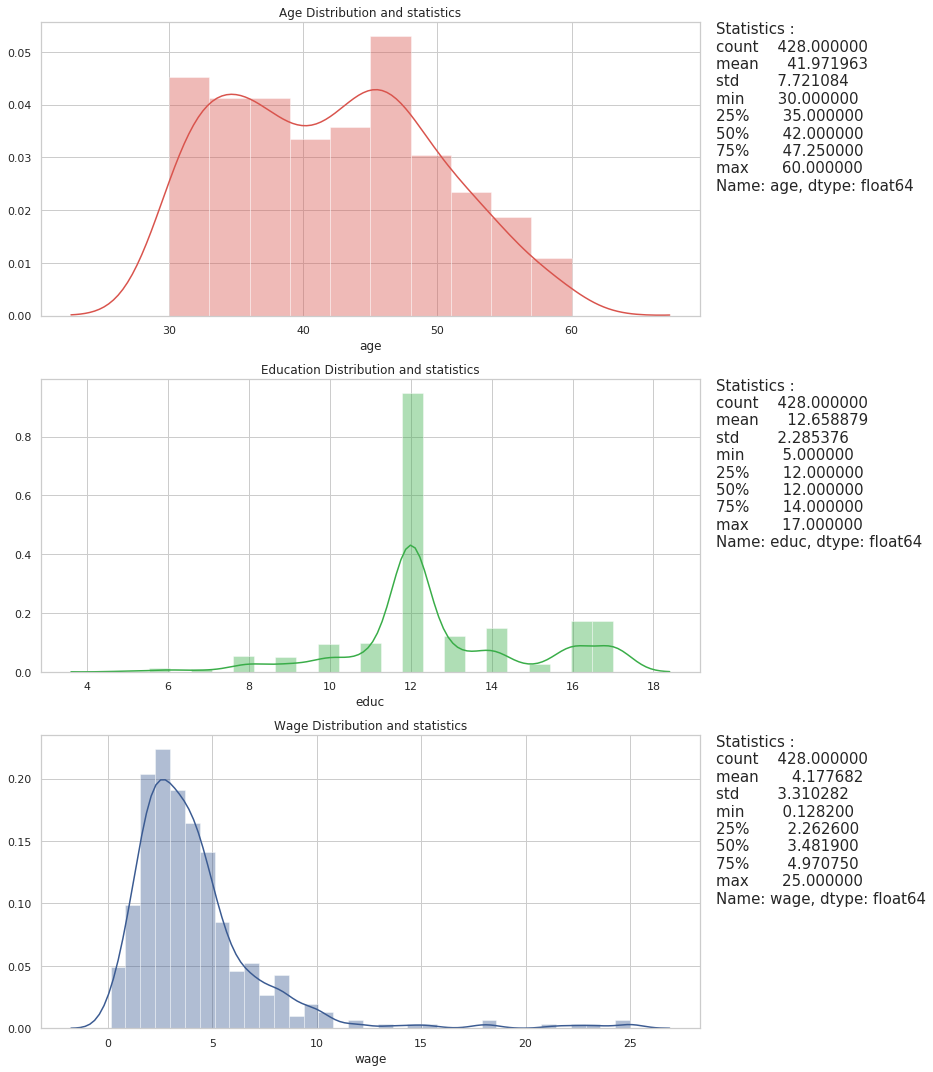

In [9]:
f , (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.set_title("Age Distribution and statistics")
sns.distplot(df['age'], ax=ax1, color = sns.xkcd_rgb["pale red"]);
plt.figtext(1, 0.82, 'Statistics :\n'+str(df['age'].describe()), axes = ax1, fontsize = 15 )
ax2.set_title("Education Distribution and statistics")
sns.distplot(df['educ'], ax=ax2, color = sns.xkcd_rgb["medium green"] );
plt.figtext(1, 0.49, 'Statistics :\n'+str(df['educ'].describe()), axes = ax2, fontsize = 15 )
ax3.set_title("Wage Distribution and statistics")
sns.distplot(df['wage'], ax=ax3, color = sns.xkcd_rgb["denim blue"]);
plt.figtext(1, 0.16, 'Statistics :\n'+str(df['wage'].describe()), axes = ax3, fontsize = 15 )
plt.tight_layout()
plt.show()

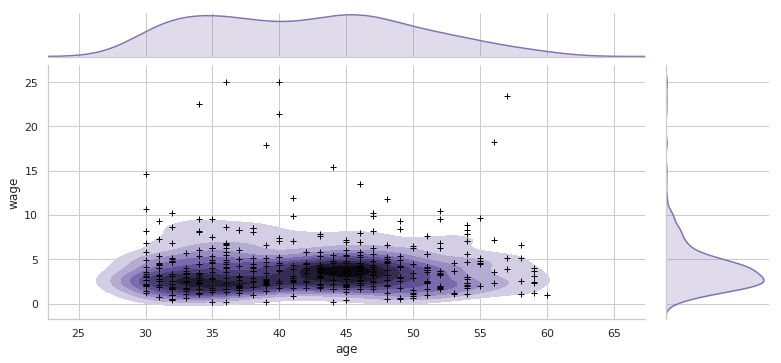

In [10]:
# We will also be interested to plot the relationship between wage & age as well as Wage & eductation
g = sns.jointplot(x="age", y="wage", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('age', 'wage')
plt.gcf().set_size_inches(12, 5)
plt.show()

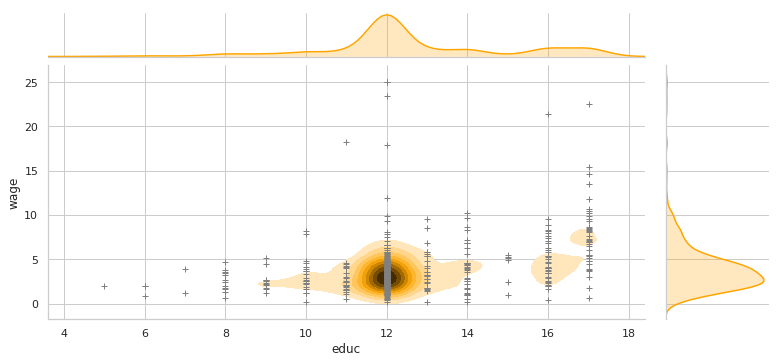

In [11]:
g = sns.jointplot(x="educ", y="wage", data=df, kind="kde", color="orange")
g.plot_joint(plt.scatter, c="gray", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('educ', 'wage')
plt.gcf().set_size_inches(12, 5)
plt.show()

In [12]:
# We will now try to make the same description for woman 
# with husband salary < or > of husbsalary median
huswage_med = np.median(df['huswage'].values)
df_above = pd.DataFrame(columns = ['age','wage','educ'])
df_below = pd.DataFrame(columns = ['age','wage','educ'])
df_above = df_above.append(df[df['huswage'] >= huswage_med][['age','wage','educ']]).astype(float)
df_below = df_below.append(df[df['huswage'] < huswage_med][['age','wage','educ']]).astype(float)

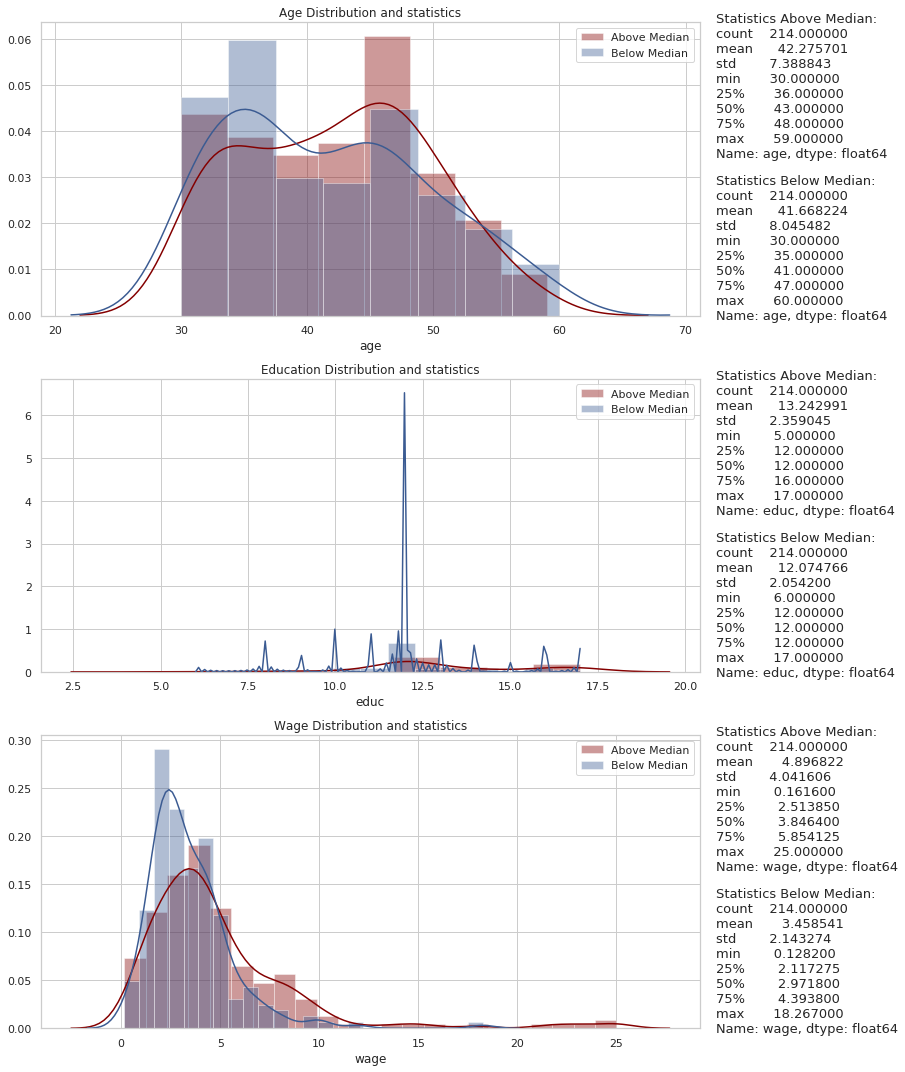

In [13]:
f , (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.set_title("Age Distribution and statistics")
sns.distplot(df_above['age'], ax=ax1, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['age'], ax=ax1, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
ax1.legend()
plt.figtext(1, 0.85, 'Statistics Above Median:\n'+str(df_above['age'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.7, 'Statistics Below Median:\n'+str(df_below['age'].describe()), axes = ax1, fontsize = 13 )
ax2.set_title("Education Distribution and statistics")
sns.distplot(df_above['educ'], ax=ax2, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['educ'], ax=ax2, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
plt.figtext(1, 0.52, 'Statistics Above Median:\n'+str(df_above['educ'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.37, 'Statistics Below Median:\n'+str(df_below['educ'].describe()), axes = ax1, fontsize = 13 )
ax2.legend()
ax3.set_title("Wage Distribution and statistics")
sns.distplot(df_above['wage'], ax=ax3, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['wage'], ax=ax3, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
plt.figtext(1, 0.19, 'Statistics Above Median:\n'+str(df_above['wage'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.04, 'Statistics Below Median:\n'+str(df_below['wage'].describe()), axes = ax1, fontsize = 13 )
ax3.legend()
plt.tight_layout()
plt.show()

### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commenter

N.B. : There is also a column 'lwage' (logarithm wage)in the dataset. To double check, we compare our calculation with the lwage of the dataset, which can be seen in the second graph of this question

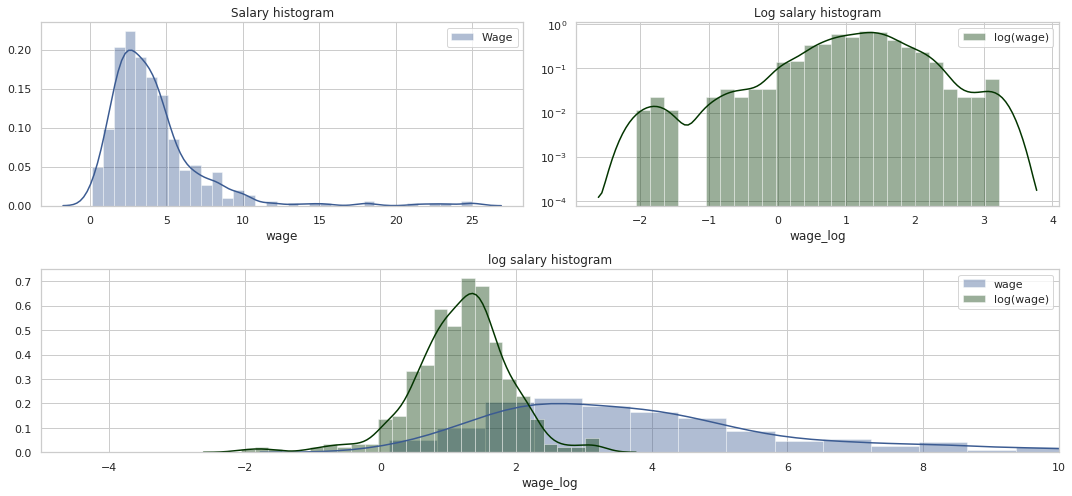

In [53]:
# Wage calculation
df["wage_log"] = np.log(df["wage"])

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(15,7))

gs = axs[1,0].get_gridspec()
axs[1,1].remove()
axs[1,0].remove()

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = fig.add_subplot(gs[1,:])

sns.distplot(df["wage"], label='Wage', color = sns.xkcd_rgb['denim blue'], ax= ax1)
ax1.set_title("Salary histogram")
ax1.legend()
           
sns.distplot(df["wage_log"], label='log(wage)', color = sns.xkcd_rgb['dark green'], ax = ax2)
ax2.set_yscale('log')
ax2.set_title("Log salary histogram")
ax2.legend()

sns.distplot(df["wage"], label='wage', color = sns.xkcd_rgb['denim blue'], ax=ax3)
sns.distplot(df["wage_log"], label='log(wage)', color = sns.xkcd_rgb['dark green'], ax=ax3)
ax3.set_title("log salary histogram")
ax3.set_xlim(-5,10)
ax3.legend()

plt.tight_layout()
plt.show()

__Comment__ : 
log wage seems to follow a uniform distribution while the wage values follow a tail distribution. The log function allow to re-uniformize the function and not be influence by the outliers (people with high salary)

## 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

To evaluate the correlation between those tow values, let's use the spearmanr function from scipy. But first let's plot the two values on a graph

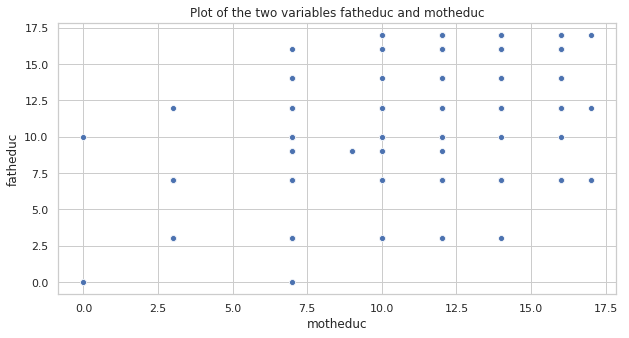

In [61]:
plt.figure(figsize = (10,5))
sns.scatterplot(x="motheduc", y="fatheduc", data=df)
plt.title('Plot of the two variables fatheduc and motheduc')
plt.show()

__comment__ : We have more than 200 samples for each variables. However, we only see 20 of them in the plot, meaning there is a limited number of combinations (fatheduc, motherduc). Therefore, it seems there is a strong correlation between those two variables. If not, we will see a cloud of points in the previous graph. 

Let's verify our guess with the calculation

In [69]:
corr_moth_fath, p_value = spearmanr(df["motheduc"], df["fatheduc"])
print("The estimated correlation between those two variables is : {:.2f}".format(corr_moth_fath))
print("The p_value for this estimated correlation is : {}".format(p_value))

The estimated correlation between those two variables is : 0.55
The p_value for this estimated correlation is : 2.580005695516474e-35


__Comment__ : With a p-value so low, we can reject the hypothesis that the two variables are indenpendent at lesst than 1%. Therefore, our intuition from the graph is confirmed and those two variables are strongly correlated and thus, if we use both this variables in the model, we will have a multi-colinearity issue. We should probably only use one of the value (or maye the mean or sum of both). 

## 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

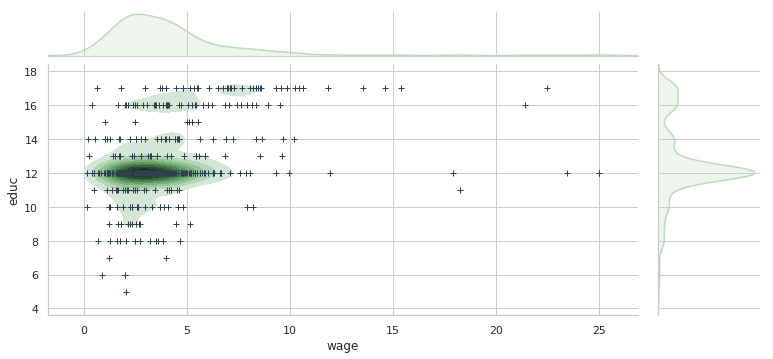

In [74]:
g = sns.jointplot(x="wage", y="educ", data=df, kind="kde", color="#bdd9bf")
g.plot_joint(plt.scatter, c="#2e4052", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('wage', 'educ')
plt.gcf().set_size_inches(12, 5)
plt.show()

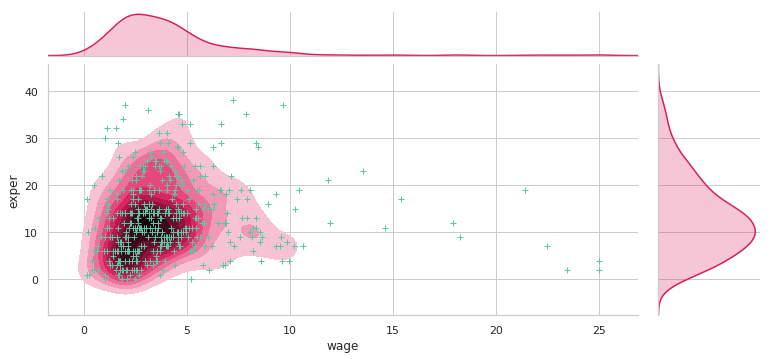

In [77]:
g = sns.jointplot(x="wage", y="exper", data=df, kind="kde", color="#d81e5b")
g.plot_joint(plt.scatter, c="#59c9a5", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('wage', 'exper')
plt.gcf().set_size_inches(12, 5)
plt.show()

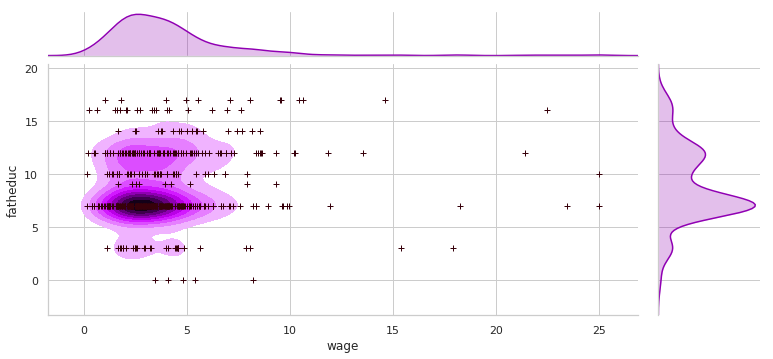

In [79]:
g = sns.jointplot(x="wage", y="fatheduc", data=df, kind="kde", color="#9000b3")
g.plot_joint(plt.scatter, c="#37000a", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('wage', 'fatheduc')
plt.gcf().set_size_inches(12, 5)
plt.show()

Commentiare

## 6
6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le
biais de variable omise


The hypothesis to have non biased estimators is non correlation between error and the explicatives variables

In [ ]:
# voir formules httpssgithub.com/mohamedalani/TelecomParistech/blob/master/Econom%C3%A9trie/Projet_econometrie.ipynb

## 7
7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ,
exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [89]:
n,k = df.shape
X_wage = np.c_[np.ones((n,1)), df[['city', 'educ','exper', 'nwifeinc', 'kidslt6', 'kidsge6']].values]
y_wage = df["wage"]

In [90]:
beta_wage, u_wage, sig2_wage, std_wage, t_wage, SSR_wage, p_value_wage = compute_pvalue_stat(X_wage,y_wage,6)

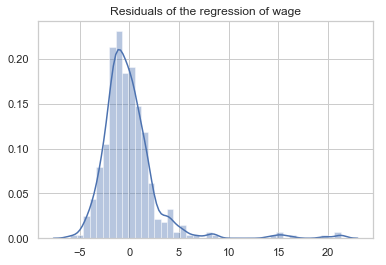

In [94]:
res_wage = pd.DataFrame(u_wage)
sns.distplot(res_wage)
plt.title("Residuals of the regression of wage")
plt.show()

commentaire

## 8
8. Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6.
Comparer l’histogramme obtenu à celui de la question 7.

In [117]:
y_lwage = df["lwage"]
beta_lwage, u_lwage, sig2_lwage, std_lwage, t_lwage, SSR_lwage, p_lvalue_wage = compute_pvalue_stat(X_wage,y_lwage,X_wage.shape[1])

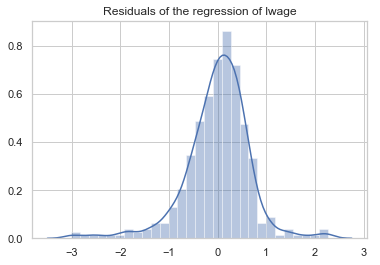

In [118]:
res_lwage = pd.DataFrame(u_lwage)
sns.distplot(res_lwage)
plt.title("Residuals of the regression of lwage")
plt.show()

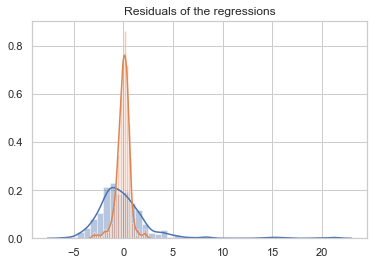

In [119]:
res_wage = pd.DataFrame(u_wage)
sns.distplot(res_wage, label='Residual wage')
sns.distplot(res_lwage, label='Residual lwage')
plt.title("Residuals of the regressions")
plt.show()

commentaire

## 9
9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et
10% (test alternatif des deux côtés). Commentez les p-values.

In [126]:
from scipy import stats


In [128]:
t_stat_10 = stats.ppf(1-0.1/2, n-X_wage.shape[1])
print("student at 10% : ", t_stat_10)


AttributeError: module 'scipy.stats' has no attribute 'ppf'

In [ ]:
t_stat_5 = stats.ppf(1-0.05/2, n-X_wage.shape[1])
print("student at 5% : ", t_stat_5)

In [123]:
t_stat_1 = stats.ppf(1-0.01/2, n-X_wage.shape[1])
print("student at 1% : ", t_stat_1)

AttributeError: module 'scipy.stats' has no attribute 'ppf'

In [124]:
print("tstats:",t_lwage)
print("tstats of exper:",t_lwage[3])
print("pvalues:",p_lvalue_wage)
print("pvalue of exper:",p_lvalue_wage[3])


tstats: [-1.92694669  0.50254687  6.77056179  3.45171828  1.46595149 -0.53105232
 -0.43435775]
tstats of exper: 3.4517182808127713
pvalues: [5.46589443e-02 6.15545661e-01 4.32454073e-11 6.13365079e-04
 1.43407982e-01 5.95662568e-01 6.64251203e-01]
pvalue of exper: 0.0006133650790141054


the tstat is superior to all the of the tstat for 1, 5 or 10%, we reject the hypothesis

## 10
10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de
significativité de 5% (test à alternatif des deux côtés)

In [129]:
print("tstats of educ:",t_lwage[2])
print("pvalue of educ:",p_lvalue_wage[2])


tstats of educ: 6.770561785365595
pvalue of educ: 4.32454072551991e-11


In [130]:
print("student at 5% : ", t_stat_5)

NameError: name 't_stat_5' is not defined

the tstat is superior to the tstat 5%, we reject the hypothesis

## 11
11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de
l’expérience professionnelle est de 5%.

In [138]:
X_wage2 = np.c_[np.ones((n,1)), df[['city', 'nwifeinc', 'kidslt6', 'kidsge6']].values]
beta_lwage2, u_lwage2, sig2_lwage2, std_lwage2, t_lwage2, SSR_lwage2, p_lvalue_wage2 = compute_pvalue_stat(X_wage2,y_lwage,X_wage2.shape[1])

deg = X_wage.shape[0] - X_wage.shape[1] -1
deg1 = X_wage2.shape[0] - X_wage2.shape[1] -1

F = ((SSR_lwage2 - SSR_lwage)/SSR_lwage2) * (deg / (deg1 - deg))

print("Fisher statistic:", F)



Fisher statistic: 25.606878492523858


In [139]:
print("student at 5% : ", t_stat_5)

NameError: name 't_stat_5' is not defined

In [140]:
p_value_f = stats.f.pdf(  F, deg1-deg, deg)
p_value_f

2.8616102457987347e-11

We reject the hypotesis

## 12
12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [145]:
print("With 10 years of experience, the increase in salary is ",100*10*beta_lwage[3],"%")

With 10 years of experience, the increase in salary is  15.487872095843317 %


## 13
13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [146]:
print("beta kidsge6:", beta_lwage[6])
print("beta kidslt6:", beta_lwage[5])

beta kidsge6: -0.01170350670436848
beta kidslt6: -0.045302870381688266


In [147]:
print("pvalue kidsge6:", p_lvalue_wage[6])
print("pvalue kidslt6:", p_lvalue_wage[5])

pvalue kidsge6: 0.6642512033788752
pvalue kidslt6: 0.5956625676765814


In [148]:
print("pvalue kidsge6:", t_lwage[6])
print("pvalue kidslt6:", t_lwage[5])

pvalue kidsge6: -0.4343577482482618
pvalue kidslt6: -0.531052318888364


In [149]:
print("student at 5% : ", t_stat_5)

NameError: name 't_stat_5' is not defined

## 14
14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en
donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en
utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux
obtenus à la question 7. Commenter.

## 15
15. Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30
ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les pvaleurs.

## 16
16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre
d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme
référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles
mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le
test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs

## 17
17. A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age,
kidslt6, kidsgt6. Interprétez les coefficients estimés.

## 18
18. Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le
test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le
résultat du test à celuir de la question 18.

## 19
19. Calculer les effets partiels pour l'ensemble des variables explicatives : p(y1)/xk (k = 1, ...,
K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la
question 17. Commentez.

## 20
20. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en
utilisant la méthode du rapport de vraisemblance. Comparez aux résultazts de la question 18.

# Partie 2

## 1
1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations
manquantes)

In [24]:
df = pd.read_excel('C://Users//Orion//Documents//MS-BGD//Econometrie/projet//quarterly.xls', sep='\s+')

df.head(20)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
5,1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131
6,1961Q3,1.68,2.30,3.01,3.90,3.98,31.50,33.33,29.95,19.32,142.00,982.7,326.50,6.77,23.74,2915.9,2991.3,18.843,32.699
7,1961Q4,2.40,2.46,3.10,3.84,3.97,31.53,33.37,29.99,19.37,146.63,1000.0,334.70,6.20,24.57,2975.3,3019.9,18.908,33.421
8,1962Q1,2.46,2.72,3.21,3.84,4.02,31.70,33.53,30.11,19.44,146.37,1020.7,341.17,5.63,24.94,3028.7,3048.7,19.020,33.136
9,1962Q2,2.61,2.72,3.02,3.63,3.87,31.53,33.43,30.22,19.51,145.33,1042.3,346.23,5.53,25.18,3062.1,3078.0,19.047,33.468


## 2
2. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

## 3
3. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la
différence entre ces deux graphiques ?

## 4
4. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces
deux conditions. Expliquez le terme "spurious regression".

## 5
5. Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

## 6
6. Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en
fonction du taux d’inflation courant et une constante.

## 7
7. Tester l’autocorrélation des erreurs.

## 8
8. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

## 9
9. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

## 10
10. Faites les tests changement de structure de Chow et détecter le point de rupture.

## 11
11. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais
en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de
Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

## 12
12. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de
terme de l’inflation sur le chômage.